In [ ]:
# This script opens a dictionary like object from a .hdf5
# file containing strain data from a black hole merger event
# detected by gravity wave detector LIGO. 
# Data from LIGO Open Science Center. https://losc.ligo.org
# Fourier Transforms and uploading of multiple files to be 
# looked into more later.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [19]:
# uploading and naming dictionary like object "dataFile"
fileName = 'L-L1_LOSC_16_V1-1167559920-32.hdf5'
dataFile = h5py.File(fileName, 'r')

In [20]:
# pulling information from "dataFile"
strain = dataFile['strain']['Strain'].value
ts = dataFile['strain']['Strain'].attrs['Xspacing']

In [21]:
# time vector in gps coordinates, then relative to event
gpsStart = dataFile['meta']['GPSstart'].value
duration = dataFile['meta']['Duration'].value
gpsEnd = gpsStart + duration

time = np.arange(gpsStart, gpsEnd, ts)
eventTime = 1167559936.6 #https://losc.ligo.org/events/GW170104/
relTime = time - eventTime


In [22]:
# event is 16.60 seconds from start
mmid_time = relTime[250000:280000];
mmid_strain = strain[250000:280000];

mid_time = relTime[200000:320000];
mid_strain = strain[200000:320000];

xsm_time = relTime[262000:279000];
xsm_strain = strain[262000:279000];
# matrix parameters should be more readable variables

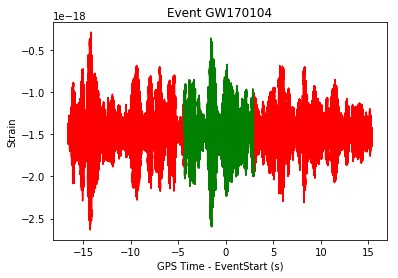

In [25]:
plt.plot(relTime, strain, 'r')
plt.plot(mid_time, mid_strain, 'g')
plt.title('Event GW170104')
plt.xlabel('GPS Time - EventStart (s)')
plt.ylabel('Strain')
plt.show()

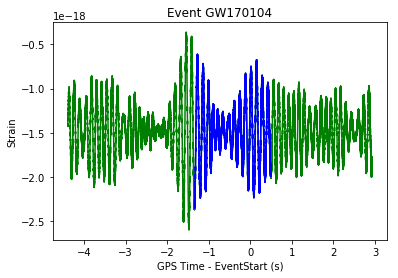

In [26]:
plt.plot(mid_time, mid_strain, 'g')
plt.plot(mmid_time, mmid_strain, 'b')
plt.title('Event GW170104')
plt.xlabel('GPS Time - EventStart (s)')
plt.ylabel('Strain')
plt.show()

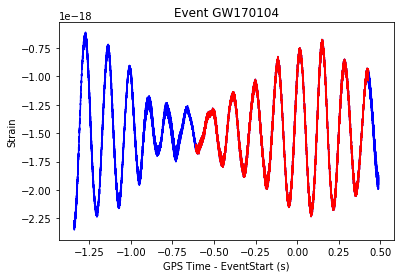

In [27]:
plt.plot(mmid_time, mmid_strain, 'b')
plt.plot(xsm_time, xsm_strain, 'r')
plt.title('Event GW170104')
plt.xlabel('GPS Time - EventStart (s)')
plt.ylabel('Strain')
plt.show()

In [85]:
for key in dataFile.keys():
    print(key)

meta
quality
strain


In [29]:
for key in dataFile['quality'].keys():
    print(key)

detail
injections
simple


In [33]:
for key in dataFile['quality']['injections'].keys():
    print(key)

InjDescriptions
InjShortnames
Injmask


In [35]:
# check if there is any injections
dataFile['quality']['injections']['InjDescriptions'].value

array([b'No CBC injections', b'No Burst injections',
       b'No detchar injections', b'No continuous wave injections',
       b'No stochastic injections'], 
      dtype='|S29')